【数据背景】新能源车电池模组的充放电数据是指电池在使用过程中进行充电和放电时所记录的相关信息。这些数据包含了电池的性能指标、工作状态和使用情况，可以帮助监测和评估电池的健康状况、性能表现以及寿命预测。这些数据通过车辆的电池管理系统（Battery Management System，简称BMS）进行监测和记录。基于这些数据，制造商和维护人员可以进行电池性能分析、故障诊断以及优化电池使用和充电策略。同时，这些数据也可以用于研究和改进电池技术，提高新能源车的续航里程和可靠性。

【应用领域】AI+电池充放电

【文件目录】20个#x的csv数据文件（比如第一辆的名称就是#1.csv）

【数据说明】共20辆新能源车的电池模组充放电数据，每个#x代表一辆新能源车电池模组的充放电数据，数据时间段为2019/07/25—2021/11/15，数据跨度约29个月，数据集大小约1.1GB。每个csv数据表包含10个数据字段，具体如下：

1. record_time：时间戳
2. soc：车辆电池剩余容量，单位为%
3. pack_voltage：电池模组电压，单位为V
4. charge_current：充电电流，单位为A
5. max_cell_voltage：电池单体最大电压，单位为V
6. min_cell_voltage：电池单体最小电压，单位为V
7. max_temperature：最高温度，单位为℃
8. min_temperature：最低温度，单位为℃
9. available_energy：可用能量，单位为kW
10. available_capacity：可用容量，单位为Ah

In [1]:
import sys
sys.path

['d:\\iCloudDrive\\Jupyter_iCloud\\LithiumBattery',
 'd:\\anaconda3\\python312.zip',
 'd:\\anaconda3\\DLLs',
 'd:\\anaconda3\\Lib',
 'd:\\anaconda3',
 '',
 'C:\\Users\\c2627\\AppData\\Roaming\\Python\\Python312\\site-packages',
 'd:\\anaconda3\\Lib\\site-packages',
 'd:\\anaconda3\\Lib\\site-packages\\win32',
 'd:\\anaconda3\\Lib\\site-packages\\win32\\lib',
 'd:\\anaconda3\\Lib\\site-packages\\Pythonwin',
 'd:\\anaconda3\\Lib\\site-packages\\setuptools\\_vendor']

In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

PATH = "D:/New-Energy-Battery/dataset/"

# 设置绘图样式  
sns.set(style="whitegrid")

# 1. 导入所有的CSV文件  
data_files = glob.glob(PATH + "/*.csv")  # 假设CSV文件在data目录下  
dataframes = []
data_files

for file in data_files:
    df = pd.read_csv(file)
    df = df.iloc[:, 1:] # 去掉第一行
    # 追加文件名作为列以便之后区分不同车辆
    df['vehicle_id'] = file.split('\\')[-1].split(".")[0]  # 获取文件名作为车辆识别
    dataframes.append(df)

# 合并所有数据框
data = pd.concat(dataframes, ignore_index=True)

# - 将record_time转换为datetime格式  
data['record_time'] = pd.to_datetime(data['record_time'], format='%Y%m%d%H%M%S', errors='coerce')  

# - 删除缺失值
data.dropna(inplace=True)

Epoch 1/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 167s 517us/step - loss: 13.0310 - mae: 0.9559 - val_loss: 0.5232 - val_mae: 0.5073
Epoch 2/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 158s 490us/step - loss: 0.4973 - mae: 0.5030 - val_loss: 0.4903 - val_mae: 0.5066
Epoch 3/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 192s 597us/step - loss: 0.4734 - mae: 0.4863 - val_loss: 0.4406 - val_mae: 0.4650
Epoch 4/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 218s 676us/step - loss: 0.4571 - mae: 0.4764 - val_loss: 0.4800 - val_mae: 0.4734
Epoch 5/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 209s 649us/step - loss: 0.4497 - mae: 0.4709 - val_loss: 0.5100 - val_mae: 0.5266
Epoch 6/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 151s 469us/step - loss: 0.4462 - mae: 0.4669 - val_loss: 0.4320 - val_mae: 0.4546
Epoch 7/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 136s 422us/step - loss: 0.4494 - mae: 0.4641 - val_loss: 0.4371 - val_mae: 0.4528
Epoch 8/20
322015/322015 ━━━━━━━━━━━━━━━━━━━━ 137s 424us/step - loss: 0.4548 - mae: 0.4623 - val_loss: 

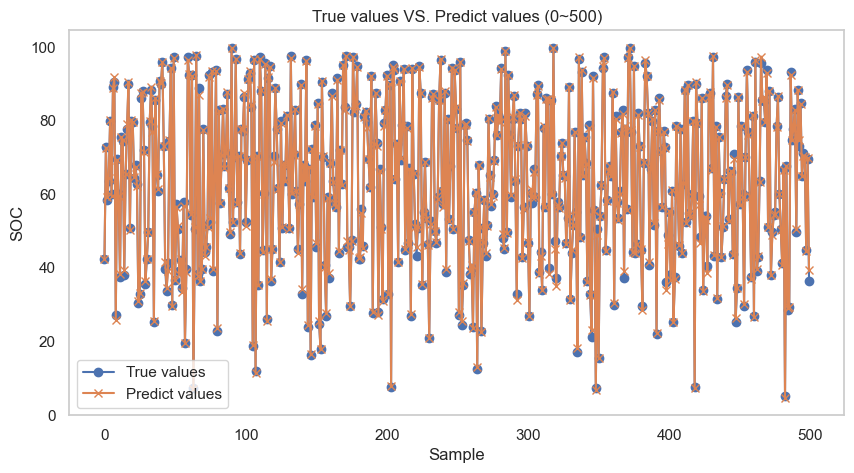

In [ ]:
# 选择特征和目标  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler  
import tensorflow as tf  
from tensorflow import keras  
from tensorflow.keras import layers  
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming 'data' is your DataFrame containing the features and target
features = data[['pack_voltage (V)', 'charge_current (A)',
                  'max_cell_voltage (V)', 'min_cell_voltage (V)',
                  'max_temperature (℃)', 'min_temperature (℃)',
                  'available_energy (kw)', 'available_capacity (Ah)']]
target = data['soc']  # 假设我们预测电池剩余容量

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # 输出层
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model and capture the history
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {test_mae}")

# Print the loss values from training
print("Training Loss Values:")
for epoch, loss in enumerate(history.history['loss']):
    print(f"Epoch {epoch + 1}: Loss = {loss}")

# 进行预测  
predictions = model.predict(X_test_scaled)  

# 可视化预测结果
LEN = 500
plt.figure(figsize=(10, 5))  
plt.plot(y_test.values[:LEN], label='True values', marker='o')  
plt.plot(predictions[:LEN], label='Predict values', marker='x')  
plt.xlabel('Sample')  
plt.ylabel('SOC')  
plt.title(f'True values VS. Predict values (0~{LEN})')  
plt.legend()  
plt.grid()  
plt.show()

In [ ]:
print("Accuracy rate:", r2_score(y_test, predictions))

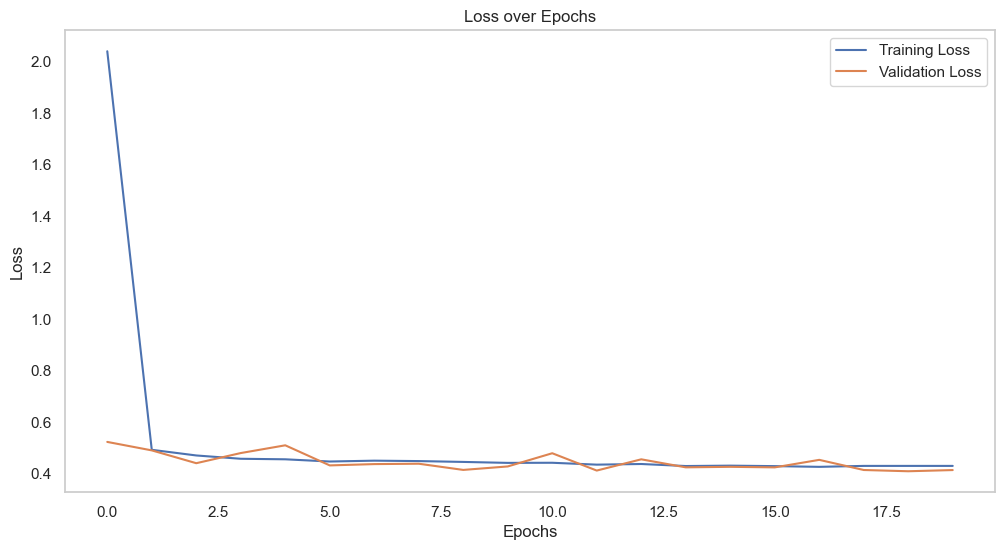

In [4]:
# Plot the loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()